# Principal Component Analysis (PCA)

# What is PCA?
 Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information in the large set.

# How PCA Works #
 1. Standardize the data.
 2. Compute the covariance matrix.
 3. Calculate eigenvectors and eigenvalues.
 4. Sort eigenvalues and select top components.
 5. Project the data onto principal components.

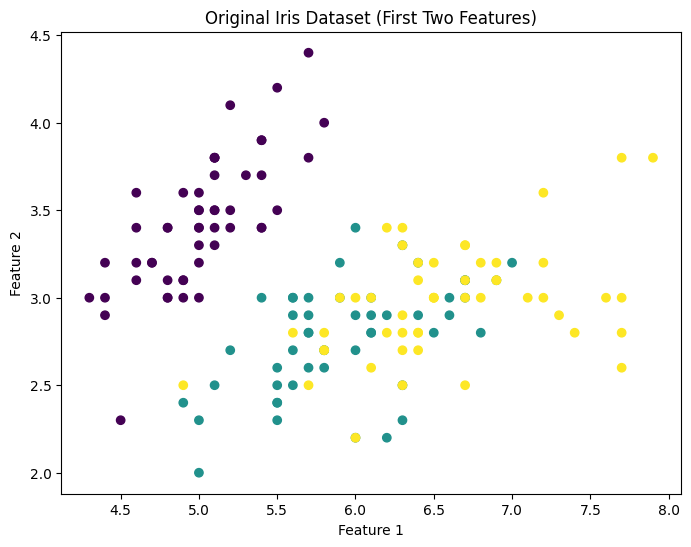

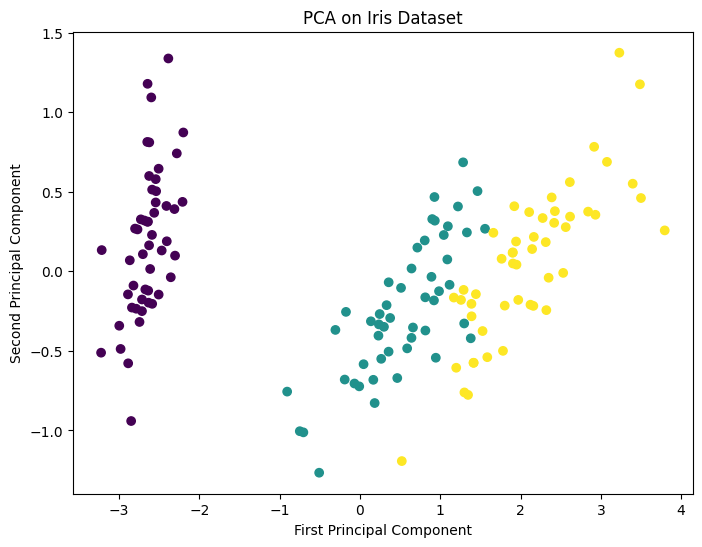

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Original Data Plot (first two features)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Iris Dataset (First Two Features)')
plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA Reduced Data Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Iris Dataset')
plt.show()

# 1. Introduction to GNNs

## What is a GNN?
 A Graph Neural Network (GNN) is a type of neural network that operates on graph structures. It captures relationships and dependencies between nodes (data points).

## Why GNNs are Important
 - Capture complex relational patterns
 - Useful for social networks, recommendation systems, molecule discovery

## Applications
 - Social Network Analysis
 - Molecular Chemistry
 - Fraud Detection

# ---

# 2. Theory

## Key Concepts
 - Message Passing
 - Aggregation
 - Update Functions

## Mathematical Formulation
1. Aggregate Neighbor Features:
  $ H_{agg} = A \times X $

    means: For each node, sum its own features + its neighbors' features.

2. Linear Transformation
    Apply a linear layer (weights + bias) to the aggregated features:

    $H_{linear} = H_{agg} \times W + b$
    
    where $W$ is a weight matrix and $b$ is a bias vector.    
3. Apply Activation
    Apply an activation function (e.g., ReLU) to make it non-linear:

    $H_{out} = \text{ReLU}(H_{linear})$

4. Get Final Results
    To predict classes:

    Usually, apply softmax to $H_{out}$ row-wise (per node).

    Pick the highest probability class for each node.

    During training, $H_{out}$ will be compared with true labels and compute loss (cross-entropy).


In [5]:
import torch
import torch.nn.functional as F

# Define adjacency matrix (with self loops added)
A = torch.tensor([
    [1, 1, 0, 0],  # Node 0 connected to Node 1
    [1, 1, 1, 0],  # Node 1 connected to Node 0 and Node 2
    [0, 1, 1, 1],  # Node 2 connected to Node 1 and Node 3
    [0, 0, 1, 1]   # Node 3 connected to Node 2
], dtype=torch.float32)

# Define feature matrix (4 nodes, each with 2 features)
X = torch.tensor([
    [1, 0],  # Node 0
    [0, 1],  # Node 1
    [1, 1],  # Node 2
    [0, 0],  # Node 3
], dtype=torch.float32)

print("Adjacency Matrix (A):\n", A)
print("Feature Matrix (X):\n", X)


Adjacency Matrix (A):
 tensor([[1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [0., 1., 1., 1.],
        [0., 0., 1., 1.]])
Feature Matrix (X):
 tensor([[1., 0.],
        [0., 1.],
        [1., 1.],
        [0., 0.]])


In [6]:
# Define a simple weight matrix (2 input features -> 2 output features)
W = torch.tensor([
    [2.0, -1.0],
    [1.0,  2.0]
], dtype=torch.float32)

# Message aggregation: A @ X
AX = A @ X
print("Aggregated Features (A @ X):\n", AX)

# Linear transformation: (A @ X) @ W
AXW = AX @ W
print("Transformed Features ((A @ X) @ W):\n", AXW)

# Apply activation (ReLU)
H = F.relu(AXW)
print("Node Embeddings after 1 GNN Layer:\n", H)


Aggregated Features (A @ X):
 tensor([[1., 1.],
        [2., 2.],
        [1., 2.],
        [1., 1.]])
Transformed Features ((A @ X) @ W):
 tensor([[3., 1.],
        [6., 2.],
        [4., 3.],
        [3., 1.]])
Node Embeddings after 1 GNN Layer:
 tensor([[3., 1.],
        [6., 2.],
        [4., 3.],
        [3., 1.]])


## 3. Problems with Basic GNNs:

- **Over-smoothing**: After several layers, node embeddings become indistinguishable.
- **Vanishing gradients**: Hard to train very deep GNNs.
- **Fixed aggregation**: Simple sum/mean cannot capture importance of neighbors.

---
Thus, researchers proposed improvements like:

- **Graph Convolutional Networks (GCN)**: Smooths the message passing via normalized Laplacian.
- **Graph Attention Networks (GAT)**: Assigns different weights to different neighbors using attention mechanism.


## 4.1 What is GCN?

GCN (Graph Convolutional Network) is an improved version of GNN that uses **spectral graph theory** to define convolution on graphs.

Instead of simple aggregation (sum/mean), GCN **normalizes** the message passing process to avoid exploding or vanishing features.

---

## 4.2 Core Mathematical Formulation of GCN:

Given:
- $A$  = Adjacency matrix
- $I$ = Identity matrix (for self-loops)
- $ \widetilde{A} = A + \lambda I $ = Adjacency with weighted self-loops
- $ \hat{D}$ = Degree matrix

The GCN forward model:


$Z = f(X,A) = \text{softmax}(\hat A \ \sigma(\hat AXW^{(0)})W^{(1)})$


Where:
- $\hat A$ = Normalized adjacency matrix
- $X$ = feature vector matrix
- $W^{(l)}$ = Trainable weight matrix
- $\sigma$ = Activation function (e.g., ReLU)

 **Normalization** with $\hat A = \hat{D}^{-1/2} \widetilde{A} \hat{D}^{-1/2}$ stabilizes training and avoids over-smoothing quickly.

---

## 5.1 What is GAT?
GAT (Graph Attention Network) introduces an attention mechanism into GNNs.

Instead of treating all neighbors equally (as in GCN), GAT learns different importance weights for each neighbor dynamically during training.

---

## 5.2 Core Mathematical Formulation of GCN:

For a node $v$ and its neighbor $u$:
1. Compute raw attention score:
    $e_{vu} = a(Wh_{v},Wh_{u})$

    Where:
    - $W$ = shared linear transformation matrix
    - $h_u$ $h_v$ = feature vectors of nodes $u$ and $v$
    - $a = attention mechanism (typically a single-layer feedforward neural network with LeakyReLU activation. The role can be simply understood as mapping into a real number)

2. Normalize using softmax over neighbors

    $ \alpha_{vu} = \frac{\exp(e_{vu})}{\sum_{w \in \mathcal{N}(v)} \exp(e_{vw})}$

    Where:
    - $\mathcal{N}(v)$ = set of neighbors of node $v$
    - $\alpha_{vu}$ = attention coefficient  for edge $vu$

3. Update the node embedding:

    $h_v' = \sigma (\sum_{u \in \mathcal{N}(v)} \alpha_{vu}Wh_u)$

    Where:
    - $\sigma$ = activation function (e.g., ELU)
    - $h_v'$ = updated node embedding

Now, the GNN learns which neighbors are more important rather than treating all equally.

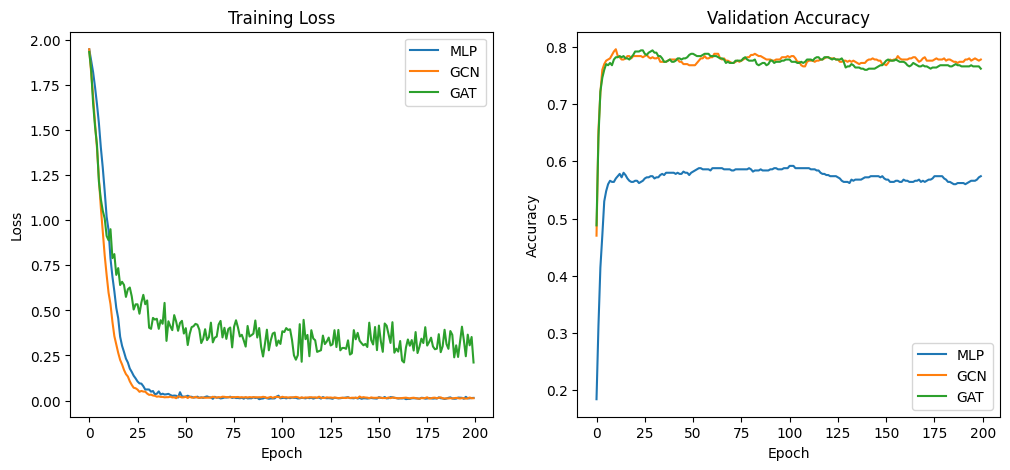

Final Validation Accuracies:
MLP: 0.5740, Test Accuracy: 0.5880
GCN: 0.7780, Test Accuracy: 0.8050
GAT: 0.7620, Test Accuracy: 0.7890


In [7]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv, GATConv
import matplotlib.pyplot as plt

# Load dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# MLP Baseline
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(dataset.num_node_features, 64)
        self.fc2 = torch.nn.Linear(64, dataset.num_classes)

    def forward(self, data):
        x = data.x
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# GCN
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 64)
        self.conv2 = GCNConv(64, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# GAT
class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.conv1 = GATConv(dataset.num_node_features, 8, heads=8, dropout=0.6)
        self.conv2 = GATConv(8*8, dataset.num_classes, heads=1, concat=False, dropout=0.6)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Training and Testing Functions
def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test(model, data):
    model.eval()
    logits = model(data)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs

# Experiment Runner
def run_experiment(model_class, data, epochs=200):
    model = model_class()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

    train_losses = []
    val_accs = []
    test_accs = []

    for epoch in range(epochs):
        loss = train(model, optimizer, data)
        train_losses.append(loss)
        train_acc, val_acc, test_acc = test(model, data)
        val_accs.append(val_acc)
        test_accs.append(test_acc)

    return train_losses, val_accs, test_accs

# Run experiments
mlp_loss, mlp_val_acc, mlp_test_acc = run_experiment(MLP, data)
gcn_loss, gcn_val_acc, gcn_test_acc = run_experiment(GCN, data)
gat_loss, gat_val_acc, gat_test_acc = run_experiment(GAT, data)

# Plot results
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(mlp_loss, label='MLP')
plt.plot(gcn_loss, label='GCN')
plt.plot(gat_loss, label='GAT')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(mlp_val_acc, label='MLP')
plt.plot(gcn_val_acc, label='GCN')
plt.plot(gat_val_acc, label='GAT')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Final Results
print(f'Final Validation Accuracies:')
print(f'MLP: {mlp_val_acc[-1]:.4f}, Test Accuracy: {mlp_test_acc[-1]:.4f}')
print(f'GCN: {gcn_val_acc[-1]:.4f}, Test Accuracy: {gcn_test_acc[-1]:.4f}')
print(f'GAT: {gat_val_acc[-1]:.4f}, Test Accuracy: {gat_test_acc[-1]:.4f}')


# 4. Advantages and Disadvantages

## Advantages
 - Handles graph structured data
 - Captures node relationships and local/global patterns

## Disadvantages
 - Computationally expensive on large graphs
 - Over-smoothing in deep layers

# 6. Tips and Tricks (Extra)

## Best Practices
 - Use dropout to avoid overfitting
 - Normalize input features

## Pitfalls
 - Overfitting on small graphs
 - Large memory usage

## Optimization Techniques
 - Layer-wise sampling (GraphSAGE)
 - Mini-batch training


# 7. Conclusion

 In this tutorial, we explored GNNs, GCNs, and GATs, implemented them, and evaluated their performances on the Cora dataset. Future directions include exploring more scalable GNNs and Transformer-based Graph Models.

 -------------------

# References

 - Kipf & Welling, "Semi-Supervised Classification with Graph Convolutional Networks" (2017)
 - Velickovic et al., "Graph Attention Networks" (2018)
 - https://pytorch-geometric.readthedocs.io/
 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
